# Linear Regression 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')


class LinearRegression:
    
    def __init__(self,learning_rate=0.001,num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        
    def fit(self,X_train,y_train):
        # initialise weights and bias paramters
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for i in range(self.num_iterations):
            y_predicted = np.dot(X_train,self.weights) + self.bias
            
            dw = (1/n_samples) * np.dot(X_train.T,(y_predicted - y_train))
            db = (1/n_samples) * np.sum(y_predicted - y_train)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
             
    def predict(self,X_test):
        self.X_test = X_test
        self.y_predicted = np.dot(X_test,self.weights) + self.bias
        return self.y_predicted
    
    def mse(self,y_test):
        return np.mean((y_test-self.y_predicted)**2)
    
    def plot(self):
        cmap = plt.get_cmap('viridis')
        fig = plt.figure(figsize=(10,10))
        m1 = plt.scatter(X_train,y_train,color=cmap(0.9),s=10)
        m2 = plt.scatter(X_test,y_test,color=cmap(0.5),s=10)
        plt.plot(self.X_test,self.y_predicted,color='black',linewidth=2,label='Prediction')
        plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [26]:
X, y = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [27]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
predicted = regressor.predict(X_test)
regressor.mse(X_test)

8225.676806932364

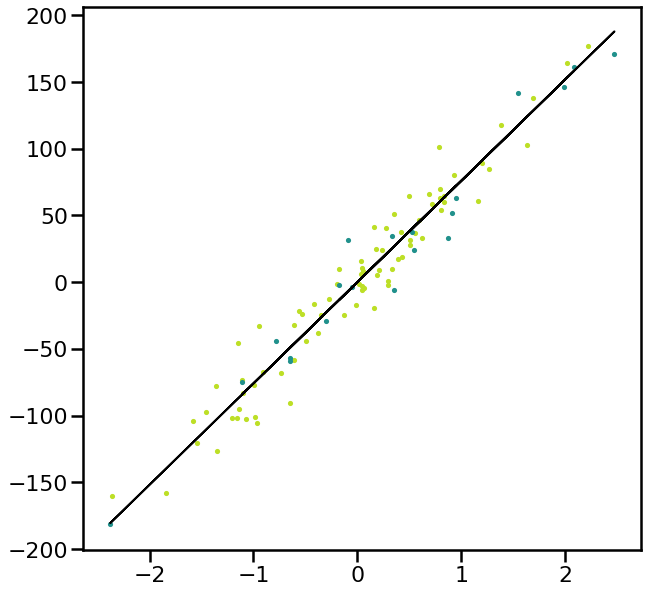

In [28]:
regressor.plot()